In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.io as pio
# open in jupyter:
pio.renderers.default = "browser"

combine monthly arrival statistics

Initially processes and analyzes the complete augmented dataset, but uses separate arrival-only and augmented-arrival datasets for saving.

In [ ]:
import pandas as pd
import glob
import os

# 1) directory containing your monthly CSVs
CSV_DIR = "Datasets/Arrival_With_Weather/2020-2022"

desired_cols = [
    "FL_DATE","AIRLINE","AIRLINE_DOT","AIRLINE_CODE","FL_NUMBER",
    "ORIGIN","ORIGIN_CITY","DEST","DEST_CITY",
    "CRS_DEP_TIME","DEP_TIME","DEP_DELAY",
    "TAXI_OUT","WHEELS_OFF","WHEELS_ON","TAXI_IN",
    "CRS_ARR_TIME","ARR_TIME","ARR_DELAY",
    "CANCELLED","CANCELLATION_CODE","DIVERTED",
    "CRS_ELAPSED_TIME","ELAPSED_TIME","AIR_TIME","DISTANCE",
    "DELAY_DUE_CARRIER","DELAY_DUE_WEATHER","DELAY_DUE_NAS",
    "DELAY_DUE_SECURITY","DELAY_DUE_LATE_AIRCRAFT",
    # weather
    "ORIGIN_TEMP","ORIGIN_PRESSURE","ORIGIN_U_COMP_WIND",
    "ORIGIN_V_COMP_WIND","ORIGIN_PRECIP_6HR",
    "DEST_TEMP","DEST_PRESSURE","DEST_U_COMP_WIND",
    "DEST_V_COMP_WIND","DEST_PRECIP_6HR",
]

# 3) rename map: current names → desired names
rename_map = {
    # flight fields (fill in your actual current column names)
    "FlightDate": "FL_DATE",
    "Reporting_Airline": "AIRLINE",
    "DOT_ID_Reporting_Airline": "AIRLINE_DOT",
    "IATA_CODE_Reporting_Airline": "AIRLINE_CODE",
    "Flight_Number_Reporting_Airline": "FL_NUMBER",
    "Origin": "ORIGIN",
    "OriginCityName": "ORIGIN_CITY",
    "Dest": "DEST",
    "DestCityName": "DEST_CITY",
    "CRSDepTime": "CRS_DEP_TIME",
    "DepTime": "DEP_TIME",
    "DepDelay": "DEP_DELAY",
    "TaxiOut": "TAXI_OUT",
    "WheelsOff": "WHEELS_OFF",
    "WheelsOn": "WHEELS_ON",
    "TaxiIn": "TAXI_IN",
    "CRSArrTime": "CRS_ARR_TIME",
    "ArrTime": "ARR_TIME",
    "ArrDelay": "ARR_DELAY",
    "Cancelled": "CANCELLED",
    "CancellationCode": "CANCELLATION_CODE",
    "Diverted": "DIVERTED",
    "CRSElapsedTime": "CRS_ELAPSED_TIME",
    "ActualElapsedTime": "ELAPSED_TIME",
    "AirTime": "AIR_TIME",
    "Distance": "DISTANCE",
    "CarrierDelay": "DELAY_DUE_CARRIER",
    "WeatherDelay": "DELAY_DUE_WEATHER",
    "NASDelay": "DELAY_DUE_NAS",
    "SecurityDelay": "DELAY_DUE_SECURITY",
    "LateAircraftDelay": "DELAY_DUE_LATE_AIRCRAFT",
    "Origin_2m_temperature": "ORIGIN_TEMP",
    "Origin_mean_sea_level_pressure": "ORIGIN_PRESSURE",
    "Origin_10m_u_component_of_wind": "ORIGIN_U_COMP_WIND",
    "Origin_10m_v_component_of_wind": "ORIGIN_V_COMP_WIND",
    "Origin_total_precipitation_6hr": "ORIGIN_PRECIP_6HR",
    "Dest_2m_temperature": "DEST_TEMP",
    "Dest_mean_sea_level_pressure": "DEST_PRESSURE",
    "Dest_10m_u_component_of_wind": "DEST_U_COMP_WIND",
    "Dest_10m_v_component_of_wind": "DEST_V_COMP_WIND",
    "Dest_total_precipitation_6hr": "DEST_PRECIP_6HR"
}

# 4) gather, standardize, and concatenate
all_files = sorted(glob.glob(os.path.join(CSV_DIR, "*.csv")))
standardized_dfs = []

for fp in all_files:
    df = pd.read_csv(fp, low_memory=False)
    # 1) rename to get FL_DATE in place
    df = df.rename(columns=rename_map)
    # 2) now safely parse the new FL_DATE
    df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])

    # ensure every desired column exists
    for col in desired_cols:
        if col not in df.columns:
            df[col] = pd.NA
    # select & reorder
    df = df[desired_cols]
    standardized_dfs.append(df)

# final merge
merged = pd.concat(standardized_dfs, ignore_index=True)

# 5) save out the combined dataset
merged.to_csv("Datasets/2020_22_Arrival_Combined.csv", index=False)


Load and view dataset

In [ ]:

df_augmented = pd.read_csv("Datasets/2020_22_Arrival_Combined.csv", encoding="utf-8")

In [7]:
df = df_augmented


In [8]:

df.shape

(6729125, 41)

In [9]:

df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'FL_NUMBER',
       'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER',
       'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT',
       'ORIGIN_TEMP', 'ORIGIN_PRESSURE', 'ORIGIN_U_COMP_WIND',
       'ORIGIN_V_COMP_WIND', 'ORIGIN_PRECIP_6HR', 'DEST_TEMP', 'DEST_PRESSURE',
       'DEST_U_COMP_WIND', 'DEST_V_COMP_WIND', 'DEST_PRECIP_6HR'],
      dtype='object')

In [10]:

df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,...,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
0,2022-01-14,YX,20452,YX,4879,CMH,"Columbus, OH",DCA,"Washington, DC",1224,...,272.70627,101848.980,-0.136428,-3.842440,0.000004,275.52435,100962.98,1.512896,-3.520301,0.000000e+00
1,2022-01-15,YX,20452,YX,4879,CMH,"Columbus, OH",DCA,"Washington, DC",1224,...,268.80804,102671.234,-1.155084,-3.400342,0.000000,268.81885,102364.97,-0.033028,-4.291523,0.000000e+00
2,2022-01-16,YX,20452,YX,4879,CMH,"Columbus, OH",DCA,"Washington, DC",1224,...,264.18630,102008.010,-2.899722,-0.738373,0.000000,264.77994,102884.10,-0.869244,-1.523108,0.000000e+00
3,2022-01-17,YX,20452,YX,4879,CMH,"Columbus, OH",DCA,"Washington, DC",1224,...,268.92142,100171.480,5.060110,-3.758925,0.002700,275.04935,98813.37,4.343108,3.316033,9.823199e-04
4,2022-01-18,YX,20452,YX,4879,CMH,"Columbus, OH",DCA,"Washington, DC",1224,...,270.19100,102037.984,2.281223,0.984579,0.000025,274.78020,101456.26,2.223987,1.218620,1.117587e-08


Convert FL_DATE to "datetime" recognized by pandas

In [11]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format='%Y-%m-%d').copy()

Toggle assertions on or off

In [12]:
TEST: bool = True

Drop cancelled and diverted flights, they are outside of our scope. we only want delayed flights(keep until finished with visualizations)

Attempt to drop duplicates, we found out there aren't any

In [13]:
df_len_with_duplicates = len(df)
df.drop_duplicates(inplace=True)
if TEST:
  assert len(df) == df_len_with_duplicates  # no duplicates

In [14]:
delay_cols = [
    "DELAY_DUE_CARRIER",
    "DELAY_DUE_WEATHER",
    "DELAY_DUE_NAS",
    "DELAY_DUE_SECURITY",
    "DELAY_DUE_LATE_AIRCRAFT"
]

def split_by_components(df: pd.DataFrame):
    # cancelled or diverted masks
    cancelled = df["CANCELLED"] == 1
    diverted  = df["DIVERTED"]  == 1

    # has _any_ positive delay component?
    has_delay = df[delay_cols].gt(0).any(axis=1)

    # only keep non‑cancelled & non‑diverted rows
    valid     = ~(cancelled | diverted)

    # slice full-rows (including weather) into two sets
    delay_df    = df.loc[has_delay  & valid].copy()
    no_delay_df = df.loc[~has_delay & valid].copy()
    n_cancel_df   = df.loc[cancelled | diverted].copy()

    return delay_df, no_delay_df, n_cancel_df

# 3) run the split
delay_df, no_delay_df, cancel_df = split_by_components(df)

Visualize presence of delay components

In [15]:
# 4) plot in Plotly
fig = px.pie(
    values=[len(delay_df), len(no_delay_df), len(cancel_df)],
    names=["Has delay components",
           "Missing delay components",
           "Cancelled or Diverted"])
fig.update_layout(
    title_text="Y Delay Components",
    title_x=0.5,
    width=800,
    height=600)
fig.show()


Visualize presence of delay components over each month in the dataset. Blue represents data that we can use.

In [16]:


# 2) get Year‑Month counts on each
delay_counts    = delay_df  ["FL_DATE"].dt.strftime("%Y-%m").value_counts().sort_index()
no_delay_counts = no_delay_df["FL_DATE"].dt.strftime("%Y-%m").value_counts().sort_index()
cancel_counts   = cancel_df ["FL_DATE"].dt.strftime("%Y-%m").value_counts().sort_index()

# 3) combine into one DataFrame
monthly = pd.concat(
    [delay_counts, no_delay_counts, cancel_counts],
    axis=1,
    keys=["Has Delay Components", "Missing Delay Components", "Cancelled or Diverted"]
).fillna(0).astype(int)

# 4) reset index to turn Year‑Month into a column
monthly = monthly.reset_index().rename(columns={"index": "FL_DATE"})

# 5) plot as a stacked bar
fig = px.bar(
    monthly,
    x="FL_DATE",
    y=["Has Delay Components", "Missing Delay Components", "Cancelled or Diverted"],
    barmode="stack",
    labels={"value": "Count", "variable": "Delay Status"}
)
fig.update_xaxes(type="category")   # preserve chronological order
fig.update_layout(
    title_text="Monthly Delay Component Breakdown",
    title_x=0.5,
    font=dict(family="Arial, sans-serif", size=20),
    width=1200
)
fig.show()


Ensure that delay components always sum to equal arrival delay(it doesnt)

In [17]:
#if TEST:
#  def check_delay_components_sum_to_arr_delay(row) -> bool:
#      components_delay = row[['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER',
#                            'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
#                            'DELAY_DUE_LATE_AIRCRAFT']].sum()
#      return components_delay == row['ARR_DELAY']
#
#  assert delay_components_df.apply(check_delay_components_sum_to_arr_delay, axis=1).all()

In [18]:
# 1) your delay component columns
delay_cols = [
    'DELAY_DUE_CARRIER','DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS','DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]


# 2) build a mask of “has any delay component > 0”
mask = df[delay_cols].fillna(0).sum(axis=1) > 0

# 3) slice out those rows (and copy to avoid SettingWithCopyWarnings)
delay_components_df = df.loc[mask].copy()

# (Optionally you can also build the other two sets:)
no_delay_components_df = df.loc[~mask & (df['CANCELLED']==0) & (df['DIVERTED']==0)].copy()
cancelled_or_diverted_df = df.loc[(df['CANCELLED']==1) | (df['DIVERTED']==1)].copy()


# 2) compute component sums, filling NaN→0
comp_sum = delay_components_df[delay_cols].fillna(0).sum(axis=1)

# 3) compare to ARR_DELAY (also fillna→0 just in case)
arr_delay = delay_components_df['ARR_DELAY'].fillna(0)
matches  = comp_sum.eq(arr_delay)

# 4) show the offending row(s)
mismatches = delay_components_df.loc[~matches, delay_cols + ['ARR_DELAY','FL_DATE','AIRLINE']]
print(f"{len(mismatches)} bad row(s):")
print(mismatches)

# 5) if you want to see the difference explicitly
mismatches = mismatches.assign(Difference=comp_sum[~matches] - arr_delay[~matches])
print(mismatches)


0 bad row(s):
Empty DataFrame
Columns: [DELAY_DUE_CARRIER, DELAY_DUE_WEATHER, DELAY_DUE_NAS, DELAY_DUE_SECURITY, DELAY_DUE_LATE_AIRCRAFT, ARR_DELAY, FL_DATE, AIRLINE]
Index: []
Empty DataFrame
Columns: [DELAY_DUE_CARRIER, DELAY_DUE_WEATHER, DELAY_DUE_NAS, DELAY_DUE_SECURITY, DELAY_DUE_LATE_AIRCRAFT, ARR_DELAY, FL_DATE, AIRLINE, Difference]
Index: []


Set data to just the delay components to simplify referencing below

In [19]:
data = delay_components_df.copy()

Remove outliers using IQR method on the overall arrival delay

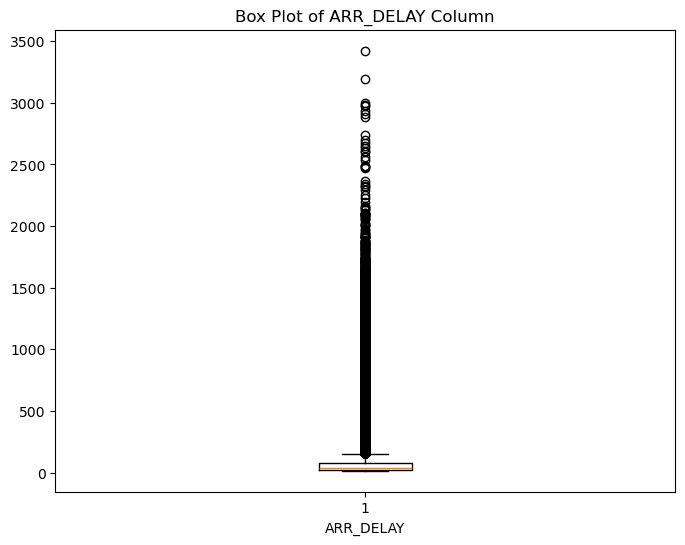

Summary Statistics after Removing Outliers:
count    1.266448e+06
mean     4.787742e+01
std      3.271110e+01
min      1.500000e+01
25%      2.300000e+01
50%      3.600000e+01
75%      6.300000e+01
max      1.540000e+02
Name: ARR_DELAY, dtype: float64
count    1.376798e+06
mean     6.728305e+01
std      9.459071e+01
min      1.500000e+01
25%      2.400000e+01
50%      4.000000e+01
75%      7.600000e+01
max      3.423000e+03
Name: ARR_DELAY, dtype: float64
0.08014973874163095
110350


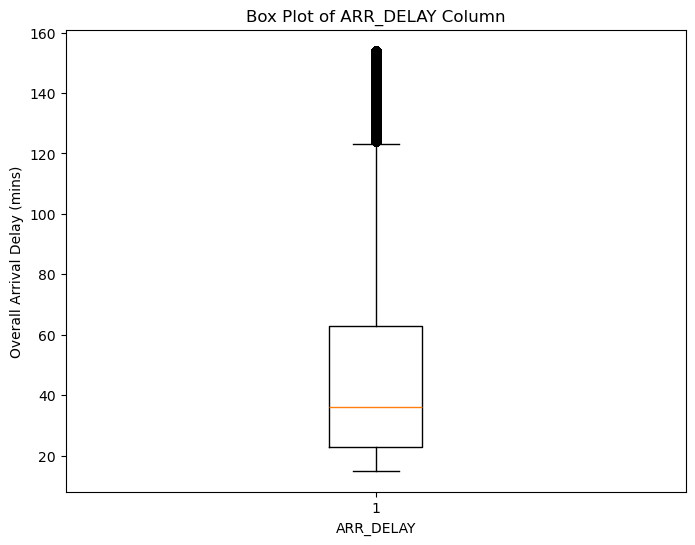

In [20]:
# Boxplot before removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data['ARR_DELAY'])
plt.title('Box Plot of ARR_DELAY Column')
plt.xlabel('ARR_DELAY')
plt.show()

# Calculate Q1, Q3, IQR
Q1 = data['ARR_DELAY'].quantile(0.25)
Q3 = data['ARR_DELAY'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[(data['ARR_DELAY'] >= lower_bound) & (data['ARR_DELAY'] <= upper_bound)]

cat_cols = ['CRS_DEP_TIME', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME',
      'DISTANCE', "DEP_DELAY", "ARR_DELAY",
    "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER",
    "DELAY_DUE_NAS",     "DELAY_DUE_SECURITY",
    "DELAY_DUE_LATE_AIRCRAFT"
]
non_cat_cols = ["CRS_DEP_TIME", "TAXI_OUT", "TAXI_IN",
    "CRS_ARR_TIME", "CRS_ELAPSED_TIME",
    "DISTANCE", "ORIGIN_TEMP", "ORIGIN_PRESSURE", "ORIGIN_U_COMP_WIND",
    "ORIGIN_V_COMP_WIND", "ORIGIN_PRECIP_6HR",
    "DEST_TEMP", "DEST_PRESSURE", "DEST_U_COMP_WIND",
    "DEST_V_COMP_WIND", "DEST_PRECIP_6HR",
]
X_cols = []
y_cols = []


print("Summary Statistics after Removing Outliers:")
print(data_no_outliers['ARR_DELAY'].describe())
print(data["ARR_DELAY"].describe())

print((len(data) - len(data_no_outliers)) / len(data))
print((len(data) - len(data_no_outliers)))

# Box plot after removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data_no_outliers['ARR_DELAY'])
plt.title('Box Plot of ARR_DELAY Column')
plt.xlabel('ARR_DELAY')
plt.ylabel("Overall Arrival Delay (mins)")
plt.show()


Calculate Pearson Correlation on just the non-categorical attributes, since Pearson Correlation is invalid for categorical attributes

In [21]:
from scipy.stats import pearsonr

def calculate_pearson_score(df: pd.DataFrame, col: str, y) -> float:
  """
  Calculates the Pearson correlation coefficient between two columns in a DataFrame.

  Args:
    df: DataFrame.
    col: The name of the first column.
    y: The name of the second column.

  Returns:
    Pearson correlation coefficient.
  """
  try:
    corr,_ = pearsonr(df[col].values, y.values)
    return corr
  except:
    return 0

# Calculate the Pearson correlation coefficient for each column w/ ARR_DELAY
pearson_scores = {}
cols=['CRS_DEP_TIME', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME',
      'DISTANCE',"ORIGIN_TEMP", "ORIGIN_PRESSURE", "ORIGIN_U_COMP_WIND",
      "ORIGIN_V_COMP_WIND", "ORIGIN_PRECIP_6HR",
      "DEST_TEMP", "DEST_PRESSURE", "DEST_U_COMP_WIND",
      "DEST_V_COMP_WIND", "DEST_PRECIP_6HR"]

for col in cols:
    pearson_scores[col] = calculate_pearson_score(data_no_outliers, col, data_no_outliers["ARR_DELAY"])

# Sort the Pearson correlation coefficients
sorted_pearson_scores = sorted(pearson_scores.items(), key=lambda x: x[1], reverse=True)

for col, score in sorted_pearson_scores:
    print(f"{col}: {score}")

# NOTE: ELAPSED TIME IS REDUNDANT

TAXI_OUT: 0.06261848480093482
CRS_DEP_TIME: 0.0624709525510905
ORIGIN_PRECIP_6HR: 0.05001369007434449
CRS_ARR_TIME: 0.043831937612799424
DEST_PRECIP_6HR: 0.03517222804758107
ORIGIN_TEMP: 0.025952944678108606
TAXI_IN: 0.025769667567464693
ORIGIN_U_COMP_WIND: 0.02335262942983732
DEST_TEMP: 0.021631922535598452
ORIGIN_V_COMP_WIND: 0.021413382851168467
DEST_U_COMP_WIND: 0.020738671310344816
DEST_V_COMP_WIND: 0.020551784829655417
CRS_ELAPSED_TIME: -0.003459819095564827
DISTANCE: -0.014641794154679286
ORIGIN_PRESSURE: -0.027283708818187195
DEST_PRESSURE: -0.03011949123932071


Calculate Kruskal-Wallis H-test to sort categorical attributes and prove redundancy for some attributes

In [22]:
from scipy.stats import kruskal

cols = ['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE',
        'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY']

# Calculate the Kruskal-Wallis H statistic for each categorical variable
h_values = {}
for col in cols:
    h, p_value = kruskal(*[group['ARR_DELAY'] for name, group in data_no_outliers.groupby(col)])
    h_values[col] = h

# Sort the columns by their H values
sorted_cols = sorted(h_values, key=h_values.get, reverse=True)

print("Categorical columns ranked by their correlation with:")
for col in sorted_cols:
    print(f"{col}: {h_values[col]}")

# drop AIRLINE_DOT, AIRLINE_CODE, DOT_CODE bc redundant w/ AIRLINE
# drop ORIGIN_CITY, DEST_CITY bc redundant (basically) w/ ORIGIN, DEST

Categorical columns ranked by their correlation with:
FL_DATE: 25197.877268599215
FL_NUMBER: 16168.042971774232
AIRLINE: 13563.04882210965
AIRLINE_DOT: 13563.04882210965
AIRLINE_CODE: 13563.04882210965
ORIGIN: 12904.35800457181
ORIGIN_CITY: 12484.66684353202
DEST: 9381.24541813707
DEST_CITY: 8993.808239852417


In [ ]:
X_aug_df = data_no_outliers[
    [
        "FL_DATE",  # yyymmdd of flight (ordinal, discrete),
        "FL_NUMBER",
        "AIRLINE",  # name of airline (nominal, discrete)
        # Ignore AIRLINE_CODE because it is redundant
        "ORIGIN",  # origin airport code (nomincal, discrete)
        # Ignore ORIGIN_CITY because it is redundant
        "DEST",  # destination airport code (nomincal, discrete)
        # Ignore DEST_CITY because it is redundant
        "CRS_DEP_TIME",  # hhmm planned departure time (ordinal, discrete)
        "CRS_ARR_TIME",  # hhmm planned arrival time (ordinal, discrete)
        # Ignore CRS_ELAPSED_TIME because it is redundant since we have CRS_DEP_TIME and CRS_ARR_TIME
        "DISTANCE",  # miles between airports (ratio, discrete)
        "TAXI_IN",
        "TAXI_OUT",
        "ORIGIN_TEMP", "ORIGIN_PRESSURE", "ORIGIN_U_COMP_WIND",  #weather observations and 'predictions'
        "ORIGIN_V_COMP_WIND", "ORIGIN_PRECIP_6HR",
        "DEST_TEMP", "DEST_PRESSURE", "DEST_U_COMP_WIND",
        "DEST_V_COMP_WIND", "DEST_PRECIP_6HR"
    ]
]

X_df = data_no_outliers[
    [
        "FL_DATE",  # yyymmdd of flight (ordinal, discrete),
        "FL_NUMBER",
        "AIRLINE",  # name of airline (nominal, discrete)
        # Ignore AIRLINE_CODE because it is redundant
        "ORIGIN",  # origin airport code (nomincal, discrete)
        # Ignore ORIGIN_CITY because it is redundant
        "DEST",  # destination airport code (nomincal, discrete)
        # Ignore DEST_CITY because it is redundant
        "CRS_DEP_TIME",  # hhmm planned departure time (ordinal, discrete)
        "CRS_ARR_TIME",  # hhmm planned arrival time (ordinal, discrete)
        # Ignore CRS_ELAPSED_TIME because it is redundant since we have CRS_DEP_TIME and CRS_ARR_TIME
        "DISTANCE",  # miles between airports (ratio, discrete)
        "TAXI_IN",
        "TAXI_OUT"
    ]
]

Y_df = data_no_outliers[
    [
        # "CANCELLATION_CODE",  # reason for cancellation, NA if not cancelled (nominal, discrete)
        # Ignore CANCELLED because it is redundant, CANCELLATION_CODE provides more information
        # "DIVERTED",  # 1 if diverted, 0 if not (ordinal, discrete) NOTE: NOT SURE IF WE WANT TO KEEP
        # "AIR_TIME",  # Flight time, minutes (ratio, discrete)
        "DELAY_DUE_CARRIER",  # delay due to technical difficulties / damage / carrier efficiency (ratio, discrete)
        # Hypothesis: AIRLINE, ORIGIN, DEST may inform DELAY_DUE_CARRIER
        "DELAY_DUE_WEATHER",  # delay due to weather (ratio, discrete)
        # Hypothesis: FL_DATE, ORIGIN, DEST may inform DELAY_DUE_WEATHER
        "DELAY_DUE_SECURITY",  # delay due to security (ratio, discrete)
        # Hypothesis: FL_DATE, ORIGIN, CRS_DEP_TIME, DISTANCE may inform DELAY_DUE_SECURITY,
        "DELAY_DUE_NAS",  # not sure how this will do due to lacking info in features
        "DELAY_DUE_LATE_AIRCRAFT"  # delay due to late aircraft (ratio, discrete)
        # Hypothesis: AIRLINE, CRS_DEP_TIME may inform DELAY_DUE_LATE_AIRCRAFT
    ]
]

arr_only_y_df = data_no_outliers["ARR_DELAY"]


# AIRLINE_CODE, DOT_CODE, FL_NUMBER are ignored because they are unique identifiers
# TAXI_OUT, WHEELS_OFF, WHEELS_ON, TAXI_IN are ignored because they seem irrelevant NOTE: MAY WANT TO LOOK INTO THIS
# DEP_TIME, DEP_DELAY, ARR_TIME, ARR_DELAY, ELAPSED_TIME are ignored because the individual delay contributions factor into them

# WARNING: DELAY_DUE_NAS might not have sufficient info to predict this. It is National Air System Delay, minutes.


Check if there are any NA values in X_df. There are none

In [ ]:
# Look for any NA values in X_aug
if TEST:
  X_aug_df.replace('', np.nan, inplace=True)
  pd.isna(X_aug_df).sum().sum() == 0

In [24]:
# Look for any NA values in X
if TEST:
  X_df.replace('', np.nan, inplace=True)
  pd.isna(X_df).sum().sum() == 0

C:\Users\ebror\AppData\Local\Temp\ipykernel_23708\3653023300.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Label encode airline and airport. ORIGIN and DEST should be encoded together to preserve the relationship between outbound and inbound same airports.

In [ ]:
# Assign integer labels to airline
airline_encoder = LabelEncoder()
X_aug_df["AIRLINE"] = airline_encoder.fit_transform(X_aug_df["AIRLINE"])

# Assign integer labels to airport code
airport_aug_encoder = LabelEncoder()
airport_aug_encoder.fit(pd.concat([X_aug_df["ORIGIN"],X_aug_df["DEST"]], axis=0))
X_aug_df["ORIGIN"] = airport_aug_encoder.transform(X_aug_df["ORIGIN"])
X_aug_df["DEST"] = airport_aug_encoder.transform(X_aug_df["DEST"])
# assert X_aug_df.loc[1, "ORIGIN"] == X_aug_df.loc[3, "ORIGIN"] == X_aug_df.loc[2, "DEST"]  # all MSP

X_aug_df.head()

In [25]:
# Assign integer labels to airline
airline_encoder = LabelEncoder()
X_df["AIRLINE"] = airline_encoder.fit_transform(X_df["AIRLINE"])

# Assign integer labels to airport code
airport_encoder = LabelEncoder()
airport_encoder.fit(pd.concat([X_df["ORIGIN"],X_df["DEST"]], axis=0))
X_df["ORIGIN"] = airport_encoder.transform(X_df["ORIGIN"])
X_df["DEST"] = airport_encoder.transform(X_df["DEST"])
# assert X_df.loc[1, "ORIGIN"] == X_df.loc[3, "ORIGIN"] == X_df.loc[2, "DEST"]  # all MSP

X_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_23708\1727180027.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ebror\AppData\Local\Temp\ipykernel_23708\1727180027.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ebror\AppData\Local\Temp\ipykernel_23708\1727180027.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
7,2022-01-21,4879,16,75,93,1224,1352,323.0,40.0,19.0,264.35350,103644.240,-2.110153,-1.568322,6.090850e-07,267.42422,103326.010,-0.667566,-3.990961,0.000000e+00
29,2022-01-15,4879,16,93,75,1010,1154,323.0,6.0,10.0,268.81885,102364.970,-0.033028,-4.291523,0.000000e+00,268.80804,102671.234,-1.155084,-3.400342,0.000000e+00
31,2022-01-17,4879,16,93,75,1010,1154,323.0,14.0,15.0,275.04935,98813.370,4.343108,3.316033,9.823199e-04,268.92142,100171.480,5.060110,-3.758925,2.699891e-03
46,2022-01-02,4879,16,93,222,2100,2239,762.0,6.0,77.0,286.01697,101146.414,1.984774,-4.274058,9.863246e-04,288.46188,100409.870,-1.310093,-2.843065,2.446222e-02
48,2022-01-04,4880,16,22,204,1439,1700,762.0,15.0,42.0,272.14508,102864.664,-2.647656,0.356938,-1.117587e-08,272.65690,102850.695,1.668302,0.607513,-1.117587e-08


Show number of unique airports

In [ ]:
print(f"Number of airports in data: {max([max(X_df['ORIGIN']), max(X_df['DEST'])]) + 1}")

In [26]:
print(f"Number of airports in augmented data: {max([max(X_aug_df['ORIGIN']), max(X_aug_df['DEST'])]) + 1}")

Number of airports: 371


Convert hhmm time format to minutes past midnight

In [27]:
def convert_hhmm_to_mins(hhmm_list):
  hours = []
  mins = []

  # Look at str length to determine number of hours and mins
  for s in hhmm_list:
    if len(s) == 1:
      hours.append(0)
      mins.append(int(s))
    elif len(s) == 2:
      hours.append(0)
      mins.append(int(s))
    elif len(s) == 3:
      hours.append(int(s[0]))
      mins.append(int(s[1:]))
    elif len(s) == 4:
        hours.append(int(s[:2]))
        mins.append(int(s[2:]))
    else:
      raise ValueError(s)

  # Calculate total minutes
  return np.array(hours) * 60 + np.array(mins)

# Convert hhmm times to minutes
X_df["CRS_DEP_TIME"] = X_df["CRS_DEP_TIME"].astype(str)
X_df["CRS_DEP_TIME"] = convert_hhmm_to_mins(X_df["CRS_DEP_TIME"])
# assert X_df["CRS_DEP_TIME"][:5].tolist() == [715, 1280, 594, 969, 1120]

X_df["CRS_ARR_TIME"] = X_df["CRS_ARR_TIME"].astype(str)
X_df["CRS_ARR_TIME"] = convert_hhmm_to_mins(X_df["CRS_ARR_TIME"])
# assert X_df["CRS_ARR_TIME"][:5].tolist() == [901, 1395, 772, 1109, 1241]

X_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_23708\3880266324.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ebror\AppData\Local\Temp\ipykernel_23708\3880266324.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ebror\AppData\Local\Temp\ipykernel_23708\3880266324.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
7,2022-01-21,4879,16,75,93,744,832,323.0,40.0,19.0,264.35350,103644.240,-2.110153,-1.568322,6.090850e-07,267.42422,103326.010,-0.667566,-3.990961,0.000000e+00
29,2022-01-15,4879,16,93,75,610,714,323.0,6.0,10.0,268.81885,102364.970,-0.033028,-4.291523,0.000000e+00,268.80804,102671.234,-1.155084,-3.400342,0.000000e+00
31,2022-01-17,4879,16,93,75,610,714,323.0,14.0,15.0,275.04935,98813.370,4.343108,3.316033,9.823199e-04,268.92142,100171.480,5.060110,-3.758925,2.699891e-03
46,2022-01-02,4879,16,93,222,1260,1359,762.0,6.0,77.0,286.01697,101146.414,1.984774,-4.274058,9.863246e-04,288.46188,100409.870,-1.310093,-2.843065,2.446222e-02
48,2022-01-04,4880,16,22,204,879,1020,762.0,15.0,42.0,272.14508,102864.664,-2.647656,0.356938,-1.117587e-08,272.65690,102850.695,1.668302,0.607513,-1.117587e-08


In [ ]:
# Convert hhmm times to minutes
X_aug_df["CRS_DEP_TIME"] = X_aug_df["CRS_DEP_TIME"].astype(str)
X_aug_df["CRS_DEP_TIME"] = convert_hhmm_to_mins(X_aug_df["CRS_DEP_TIME"])
# assert X_aug_df["CRS_DEP_TIME"][:5].tolist() == [715, 1280, 594, 969, 1120]

X_aug_df["CRS_ARR_TIME"] = X_aug_df["CRS_ARR_TIME"].astype(str)
X_aug_df["CRS_ARR_TIME"] = convert_hhmm_to_mins(X_aug_df["CRS_ARR_TIME"])
# assert X_aug_df["CRS_ARR_TIME"][:5].tolist() == [901, 1395, 772, 1109, 1241]

X_aug_df.head()

Convert distance to an integer in case it is not. Data is recorded as discrete integer values.

In [ ]:
# Convert distance to int, its already an int basically
X_df["DISTANCE"] = df["DISTANCE"].astype(int)
X_df.head()

In [28]:
# Convert distance to int, its already an int basically
X_aug_df["DISTANCE"] = df["DISTANCE"].astype(int)
X_aug_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_23708\2097329403.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
7,2022-01-21,4879,16,75,93,744,832,323,40.0,19.0,264.35350,103644.240,-2.110153,-1.568322,6.090850e-07,267.42422,103326.010,-0.667566,-3.990961,0.000000e+00
29,2022-01-15,4879,16,93,75,610,714,323,6.0,10.0,268.81885,102364.970,-0.033028,-4.291523,0.000000e+00,268.80804,102671.234,-1.155084,-3.400342,0.000000e+00
31,2022-01-17,4879,16,93,75,610,714,323,14.0,15.0,275.04935,98813.370,4.343108,3.316033,9.823199e-04,268.92142,100171.480,5.060110,-3.758925,2.699891e-03
46,2022-01-02,4879,16,93,222,1260,1359,762,6.0,77.0,286.01697,101146.414,1.984774,-4.274058,9.863246e-04,288.46188,100409.870,-1.310093,-2.843065,2.446222e-02
48,2022-01-04,4880,16,22,204,879,1020,762,15.0,42.0,272.14508,102864.664,-2.647656,0.356938,-1.117587e-08,272.65690,102850.695,1.668302,0.607513,-1.117587e-08


Break datetime into separate YEAR, MONTH, DAY attributes

In [ ]:
# Convert FL_DATE column to datetime
X_df['FL_DATE'] = pd.to_datetime(X_df['FL_DATE'])

X_df['YEAR'] = X_df['FL_DATE'].dt.year
X_df['MONTH'] = X_df['FL_DATE'].dt.month
X_df['DAY'] = X_df['FL_DATE'].dt.day

# Drop the original column
X_df.drop(columns=['FL_DATE'], inplace=True)

if TEST:
    assert X_df["MONTH"].min() == 1
    assert X_df["MONTH"].max() == 12
    assert X_df["DAY"].min() == 1
    assert X_df["DAY"].max() == 31

X_df.head()

In [29]:
# Convert FL_DATE column to datetime
X_aug_df['FL_DATE'] = pd.to_datetime(X_aug_df['FL_DATE'])

X_aug_df['YEAR'] = X_aug_df['FL_DATE'].dt.year
X_aug_df['MONTH'] = X_aug_df['FL_DATE'].dt.month
X_aug_df['DAY'] = X_aug_df['FL_DATE'].dt.day

# Drop the original column
X_aug_df.drop(columns=['FL_DATE'], inplace=True)

if TEST:
    assert X_aug_df["MONTH"].min() == 1
    assert X_aug_df["MONTH"].max() == 12
    assert X_aug_df["DAY"].min() == 1
    assert X_aug_df["DAY"].max() == 31

X_aug_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_23708\2737446006.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ebror\AppData\Local\Temp\ipykernel_23708\2737446006.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ebror\AppData\Local\Temp\ipykernel_23708\2737446006.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,...,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR,YEAR,MONTH,DAY
7,4879,16,75,93,744,832,323,40.0,19.0,264.35350,...,-1.568322,6.090850e-07,267.42422,103326.010,-0.667566,-3.990961,0.000000e+00,2022,1,21
29,4879,16,93,75,610,714,323,6.0,10.0,268.81885,...,-4.291523,0.000000e+00,268.80804,102671.234,-1.155084,-3.400342,0.000000e+00,2022,1,15
31,4879,16,93,75,610,714,323,14.0,15.0,275.04935,...,3.316033,9.823199e-04,268.92142,100171.480,5.060110,-3.758925,2.699891e-03,2022,1,17
46,4879,16,93,222,1260,1359,762,6.0,77.0,286.01697,...,-4.274058,9.863246e-04,288.46188,100409.870,-1.310093,-2.843065,2.446222e-02,2022,1,2
48,4880,16,22,204,879,1020,762,15.0,42.0,272.14508,...,0.356938,-1.117587e-08,272.65690,102850.695,1.668302,0.607513,-1.117587e-08,2022,1,4


In [ ]:
X_df.drop(columns=["FL_NUMBER"], inplace=True)
X_df

In [30]:
X_aug_df.drop(columns=["FL_NUMBER"], inplace=True)
X_aug_df

C:\Users\ebror\AppData\Local\Temp\ipykernel_23708\3038037169.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,ORIGIN_PRESSURE,...,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR,YEAR,MONTH,DAY
7,16,75,93,744,832,323,40.0,19.0,264.35350,103644.240,...,-1.568322,6.090850e-07,267.42422,103326.010,-0.667566,-3.990961,0.000000e+00,2022,1,21
29,16,93,75,610,714,323,6.0,10.0,268.81885,102364.970,...,-4.291523,0.000000e+00,268.80804,102671.234,-1.155084,-3.400342,0.000000e+00,2022,1,15
31,16,93,75,610,714,323,14.0,15.0,275.04935,98813.370,...,3.316033,9.823199e-04,268.92142,100171.480,5.060110,-3.758925,2.699891e-03,2022,1,17
46,16,93,222,1260,1359,762,6.0,77.0,286.01697,101146.414,...,-4.274058,9.863246e-04,288.46188,100409.870,-1.310093,-2.843065,2.446222e-02,2022,1,2
48,16,22,204,879,1020,762,15.0,42.0,272.14508,102864.664,...,0.356938,-1.117587e-08,272.65690,102850.695,1.668302,0.607513,-1.117587e-08,2022,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6729098,4,327,315,661,734,689,16.0,21.0,287.07670,101577.460,...,-0.195059,6.747991e-05,286.41864,102323.800,-1.090004,-0.122332,1.592562e-06,2022,9,30
6729111,4,22,105,1085,1203,594,6.0,13.0,298.69190,101464.836,...,-3.221548,1.117587e-08,295.69302,100969.836,2.494725,-1.974522,7.975847e-05,2022,9,13
6729118,4,22,105,1085,1203,594,10.0,11.0,303.70618,101561.020,...,-2.885752,4.151613e-04,298.45764,101664.540,1.129968,1.747070,0.000000e+00,2022,9,20
6729119,4,22,105,1085,1203,594,9.0,9.0,304.63740,101493.380,...,-0.380128,0.000000e+00,298.69635,100717.110,6.656410,-0.178457,1.775483e-03,2022,9,21


Taxi in and taxi out to int

In [ ]:
X_df["TAXI_IN"] = X_df["TAXI_IN"].astype(int)
X_df["TAXI_OUT"] = X_df["TAXI_OUT"].astype(int)

In [31]:
X_aug_df["TAXI_IN"] = X_aug_df["TAXI_IN"].astype(int)
X_aug_df["TAXI_OUT"] = X_aug_df["TAXI_OUT"].astype(int)

C:\Users\ebror\AppData\Local\Temp\ipykernel_23708\3527431485.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ebror\AppData\Local\Temp\ipykernel_23708\3527431485.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Look for any NA values in Y. We found that there are not any

In [32]:
if TEST:
  Y_df.replace('', np.nan, inplace=True)
  assert pd.isna(Y_df).sum().sum() == 0

C:\Users\ebror\AppData\Local\Temp\ipykernel_23708\3814927210.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Convert Y to int (all values are already integers in the data). Ensure length matches length of X_df.

In [33]:
Y_df = Y_df.astype(int)
if TEST:
  assert len(X_df) == len(Y_df)

In [34]:
arr_only_y_df = arr_only_y_df.astype(int)

Split into train and test using 75/25 split and random_state

In [ ]:
X_train_aug, X_test_aug, Y_train, Y_test, y_arr_only_train, y_arr_only_test = train_test_split(X_aug_df, Y_df, arr_only_y_df, random_state=42, test_size=0.25)

In [35]:
X_train, X_test, Y_train, Y_test, y_arr_only_train, y_arr_only_test = train_test_split(X_df, Y_df, arr_only_y_df, random_state=42, test_size=0.25)

Scale numeric columns using Z-normalization. Fit to X_train, apply to X_test to prevent data leakage.

In [36]:
numeric_columns_aug = ["CRS_DEP_TIME", "CRS_ARR_TIME", "DISTANCE", "TAXI_IN", "TAXI_OUT","ORIGIN_TEMP", "ORIGIN_PRESSURE", "ORIGIN_U_COMP_WIND",
    "ORIGIN_V_COMP_WIND", "ORIGIN_PRECIP_6HR","DEST_TEMP", "DEST_PRESSURE", "DEST_U_COMP_WIND","DEST_V_COMP_WIND", "DEST_PRECIP_6HR"]
categorical_columns = ["AIRLINE", "ORIGIN", "DEST", "YEAR", "MONTH", "DAY"]
scaler = StandardScaler()
X_train_scale_aug = pd.DataFrame(scaler.fit_transform(X_train_aug[numeric_columns_aug]), columns=numeric_columns_aug, index=X_train_aug.index)
X_test_scale_aug = pd.DataFrame(scaler.transform(X_test_aug[numeric_columns_aug]), columns=numeric_columns_aug, index=X_test_aug.index)

X_train_scale_aug = pd.concat([X_train_aug[categorical_columns], X_train_scale_aug], axis=1)
X_test_scale_aug = pd.concat([X_test_aug[categorical_columns], X_test_scale_aug], axis=1)

X_train_scale_aug.head()

,AIRLINE,ORIGIN,DEST,YEAR,MONTH,DAY,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,...,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
4477663,11,105,20,2022,6,17,-1.035748,-0.975128,-1.101143,-0.252361,...,0.517365,-0.626133,1.319466,-0.449908,-0.301059,0.037722,-1.036824,2.045322,-0.105863,-0.307575
6412999,8,14,254,2022,9,11,0.637227,0.562215,-0.211851,0.433922,...,0.641655,0.436088,-0.083089,0.494024,-0.213518,0.164856,-0.607227,-0.157210,-1.534095,4.729997
5104236,13,22,254,2022,7,21,-0.870958,-0.793527,-0.410036,-0.448442,...,0.765332,-0.386357,0.185783,0.486627,-0.299613,0.387980,-1.185666,1.142408,-0.356972,-0.307575
5910799,11,317,305,2022,8,1,1.077861,0.981775,-0.679365,-0.644523,...,-0.114669,0.137062,0.188519,-0.932348,-0.297426,0.612311,-0.235738,1.225274,0.011208,-0.307568
5292288,14,159,248,2022,7,10,1.131597,0.872188,-1.267144,-0.546483,...,0.332772,0.418565,-1.892676,-2.173703,-0.299250,0.283925,0.431498,-1.864768,-2.173125,-0.305844


In [ ]:
X_train_scale_aug.to_csv("data/X_train_label.csv", index=False)
X_test_scale_aug.to_csv("data/X_test_label.csv", index=False)

In [ ]:
Y_train.to_csv("data/Y_train.csv", index=False)
Y_test.to_csv("data/Y_test.csv", index=False)
y_arr_only_train.to_csv("data/arr_delay_only_y_train.csv", index=False)
y_arr_only_test.to_csv("data/arr_delay_only_y_test.csv", index=False)

In [ ]:
numeric_columns = ["CRS_DEP_TIME", "CRS_ARR_TIME", "DISTANCE", "TAXI_IN", "TAXI_OUT"]
categorical_columns = ["AIRLINE", "ORIGIN", "DEST", "YEAR", "MONTH", "DAY"]
scaler = StandardScaler()
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train[numeric_columns]), columns=numeric_columns, index=X_train.index)
X_test_scale = pd.DataFrame(scaler.transform(X_test[numeric_columns]), columns=numeric_columns, index=X_test.index)

X_train_scale = pd.concat([X_train[categorical_columns], X_train_scale], axis=1)
X_test_scale = pd.concat([X_test[categorical_columns], X_test_scale], axis=1)

X_train_scale.head()

Save label-encoded X data to CSV

In [ ]:
X_train_scale.to_csv("data/old_data/X_train_label.csv", index=False)
X_test_scale.to_csv("data/old_data/X_test_label.csv", index=False)

Save Y data to CSV

In [ ]:
Y_train.to_csv("data/old_data/Y_train.csv", index=False)
Y_test.to_csv("data/old_data/Y_test.csv", index=False)
y_arr_only_train.to_csv("data/old_data/arr_delay_only_y_train.csv", index=False)
y_arr_only_test.to_csv("data/old_data/arr_delay_only_y_test.csv", index=False)